In [1]:
import pandas as pd

In [2]:
from exploration.stats import get_data_summary, get_basic_stats, get_class_distribution, get_channel_correlations, get_outlier_counts

In [3]:
path = '../data/BEED_Data.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
summary = get_data_summary(df)
basic_stats = get_basic_stats(df)
class_dist = get_class_distribution(df)
correlations = get_channel_correlations(df)
outliers = get_outlier_counts(df, z_thresh=3.0)

Dataset Summary:
Total samples: 8000
Total channels: 16
Classes: [0, 1, 2, 3]
Missing values: 0 (0.00%)

Class Distribution:
  Class 0: 2000 samples (25.0%)
  Class 1: 2000 samples (25.0%)
  Class 2: 2000 samples (25.0%)
  Class 3: 2000 samples (25.0%)
Class Distribution:
Class 0: 2000 samples (25.0%)
Class 1: 2000 samples (25.0%)
Class 2: 2000 samples (25.0%)
Class 3: 2000 samples (25.0%)
Outlier Counts (Z-score > 3.0):
X1     229
X2     233
X3     239
X4     227
X5     211
X6     236
X7     234
X8     245
X9     223
X10    227
X11    225
X12    218
X13    197
X14    218
X15    223
X16    238
dtype: int64


In [6]:
from exploration.visualize import plot_class_distribution, plot_eeg_waveforms, plot_correlation_heatmap, create_eda_report

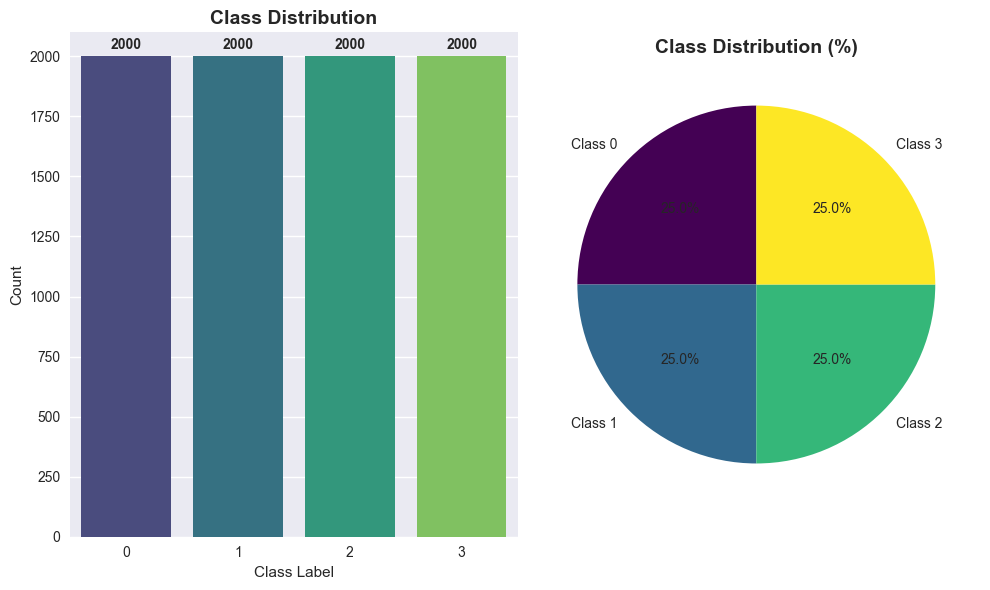

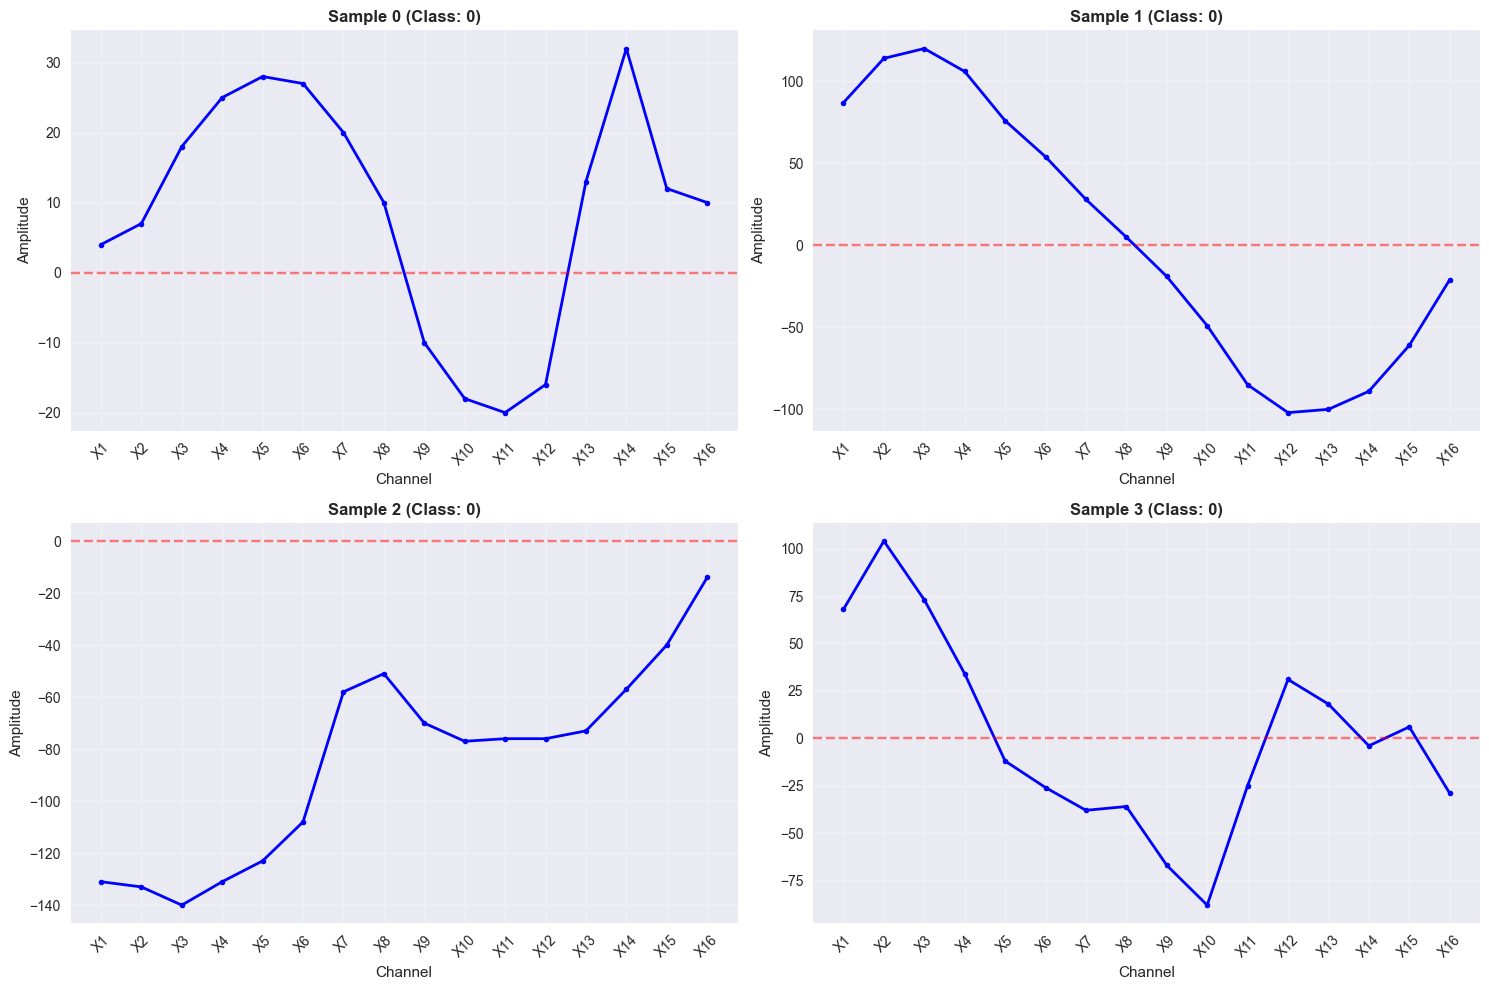

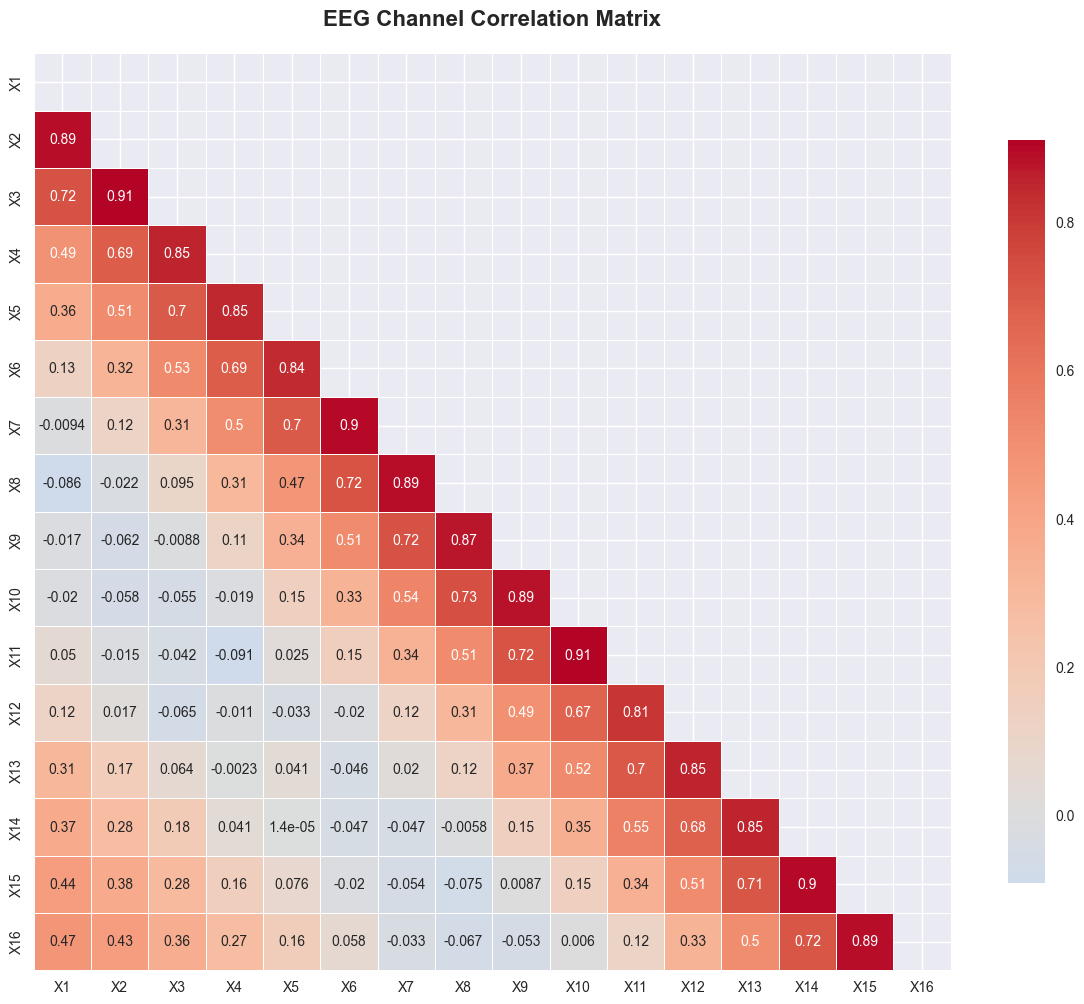


1. Class Distribution Analysis


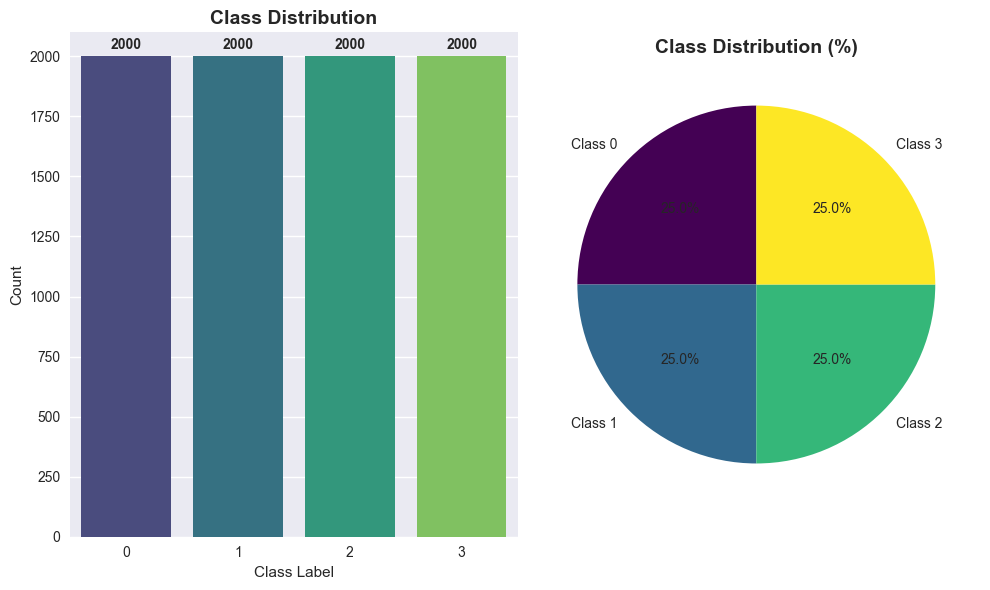


2. Channel Distribution Analysis


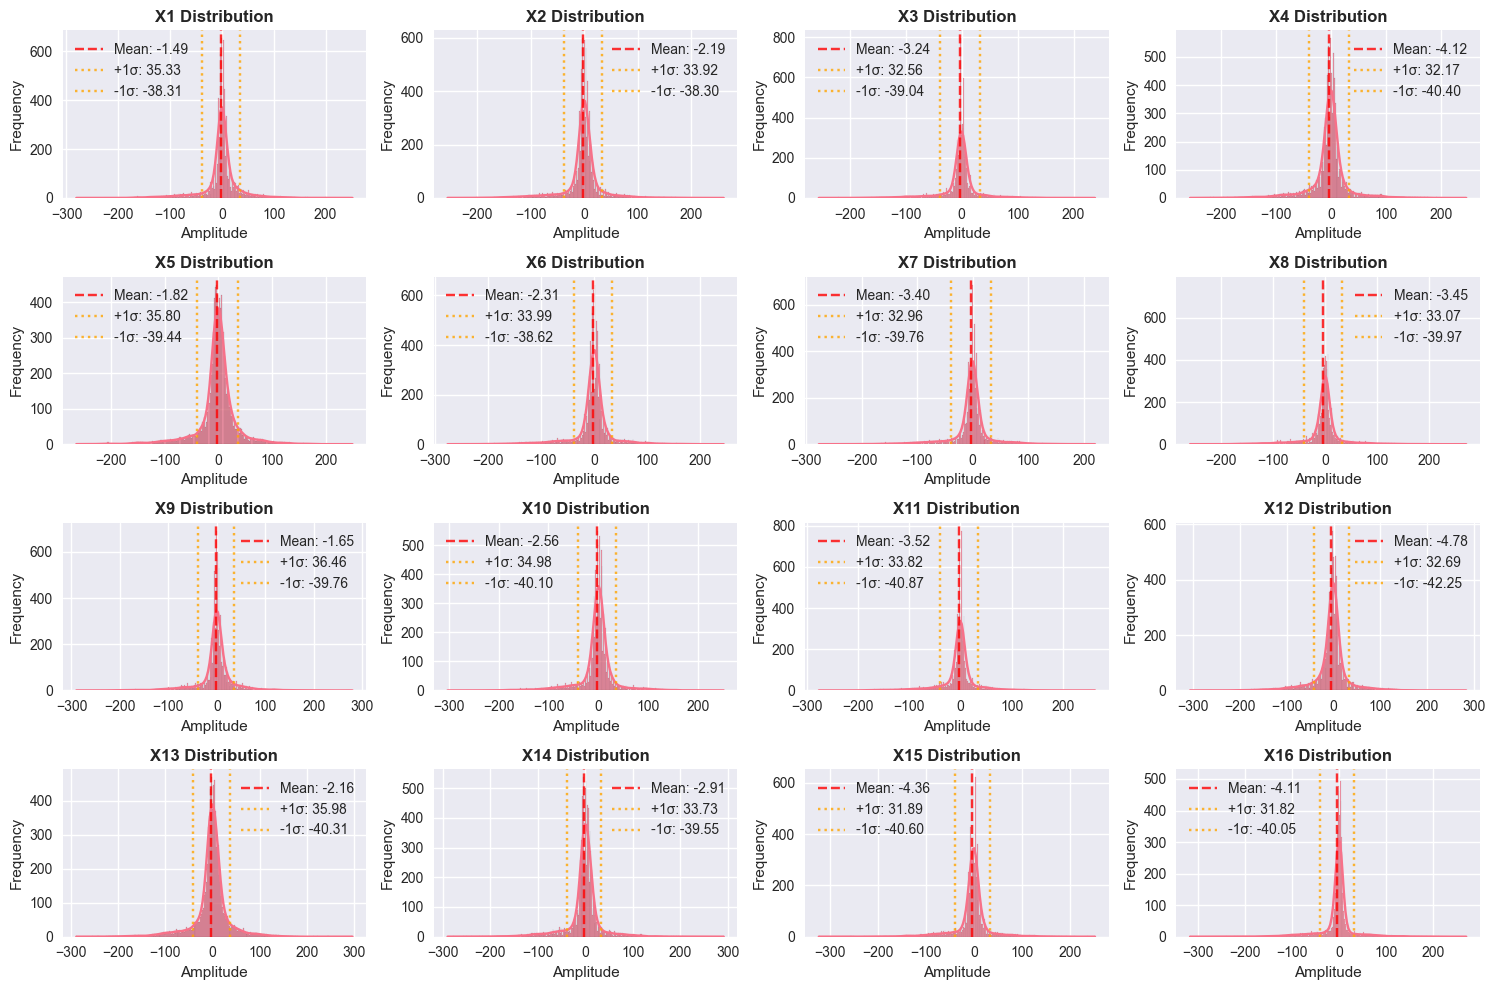


3. Channel Correlation Analysis


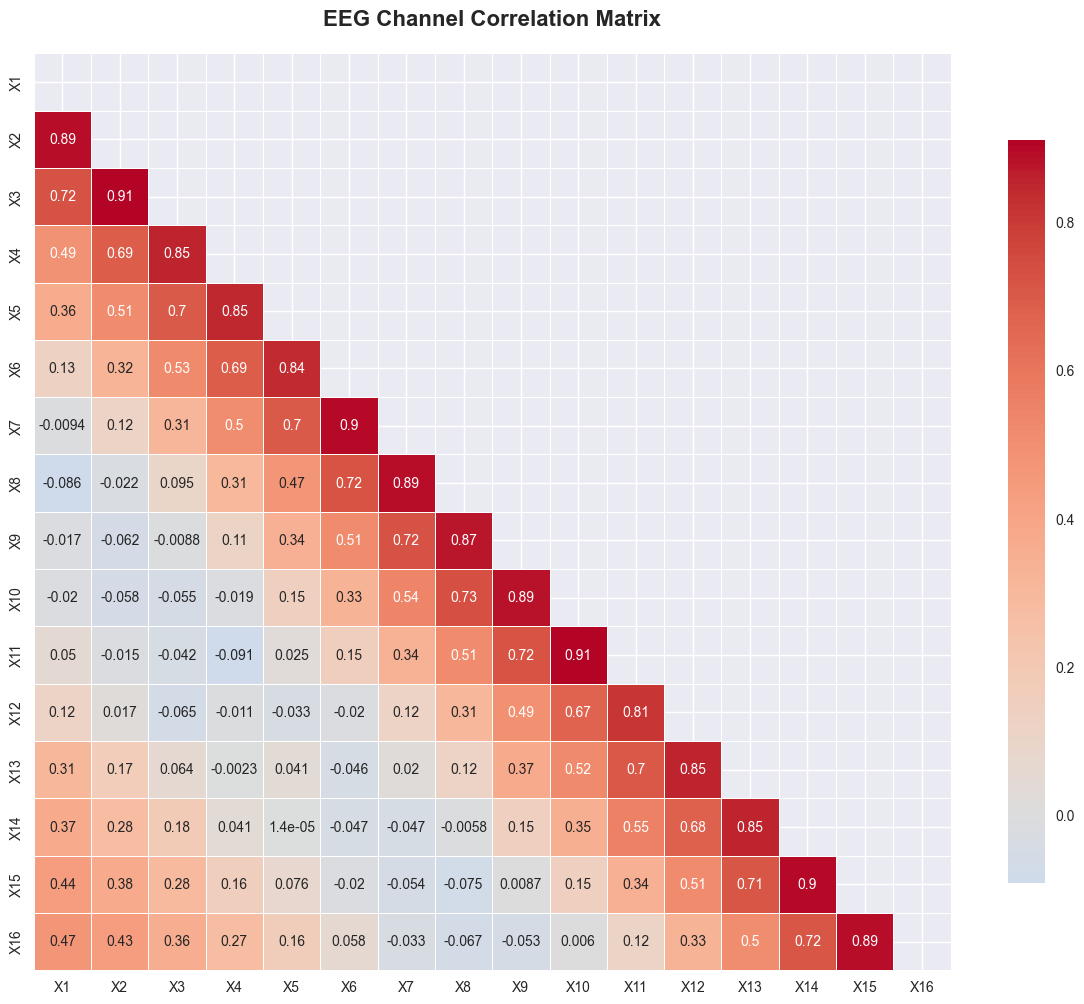


4. Class Comparison Analysis


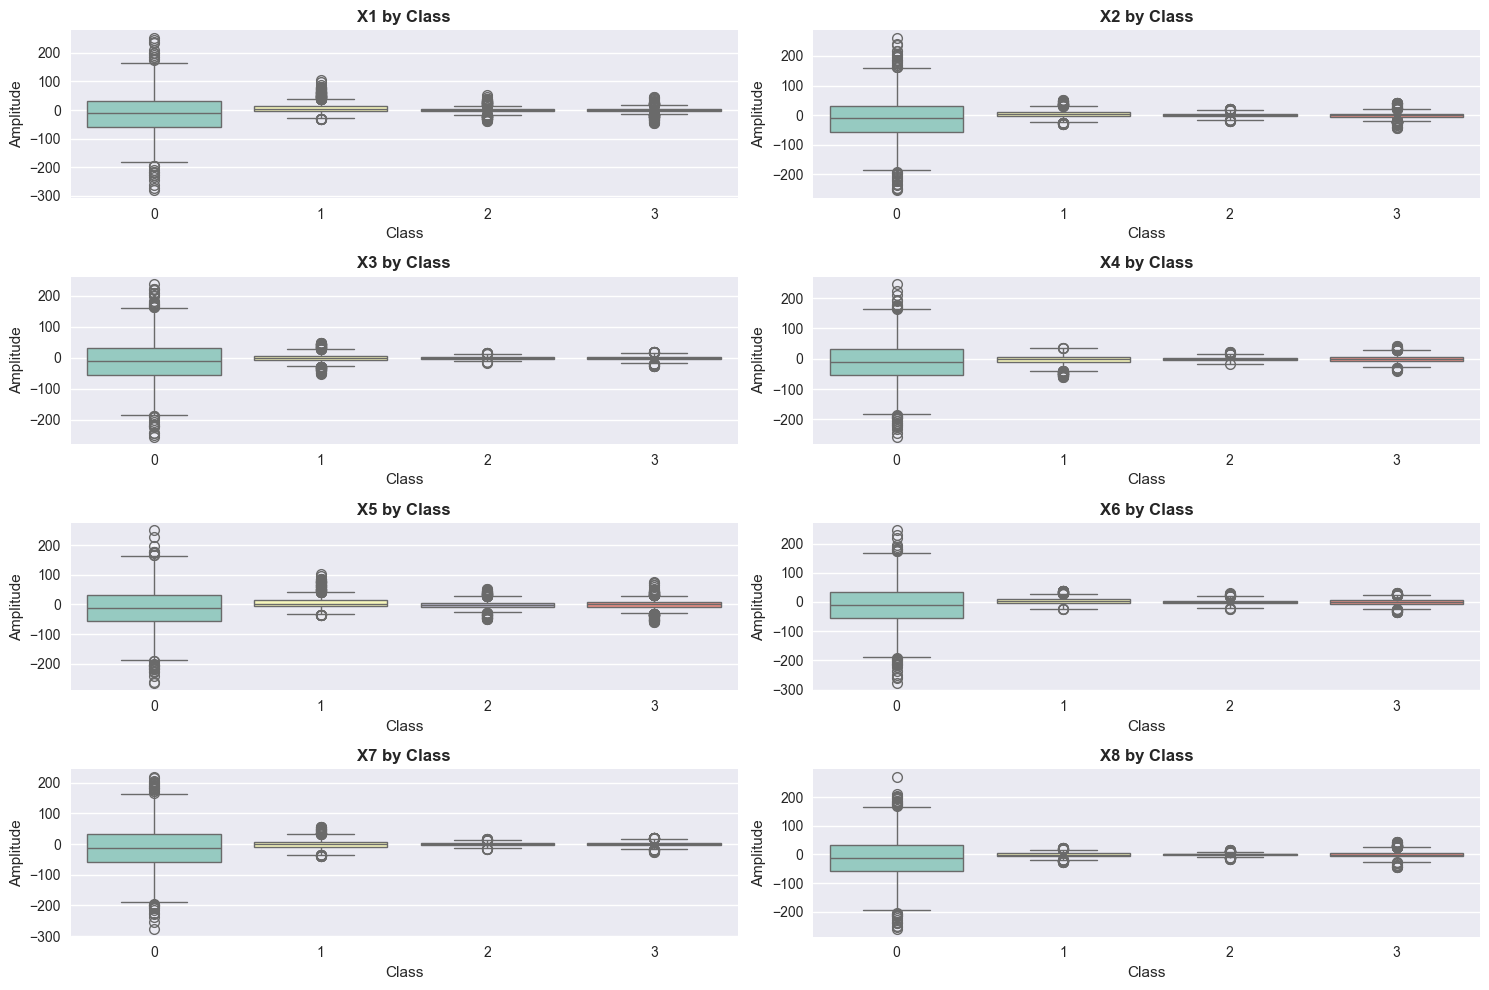


5. EEG Waveform Analysis


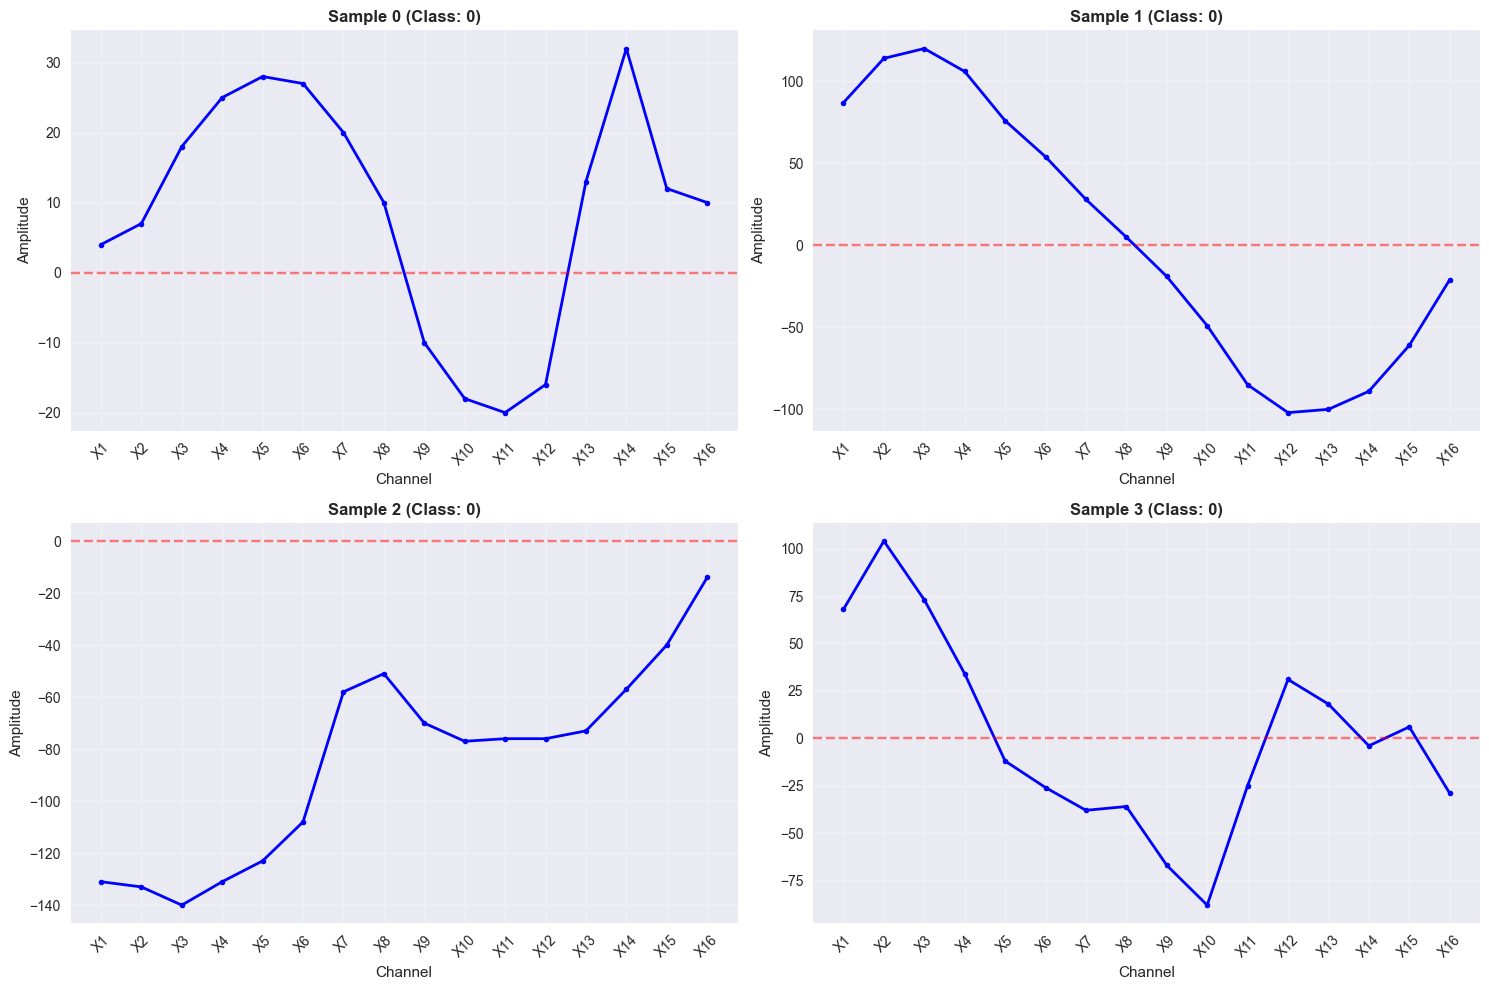


6. Channel Means by Class


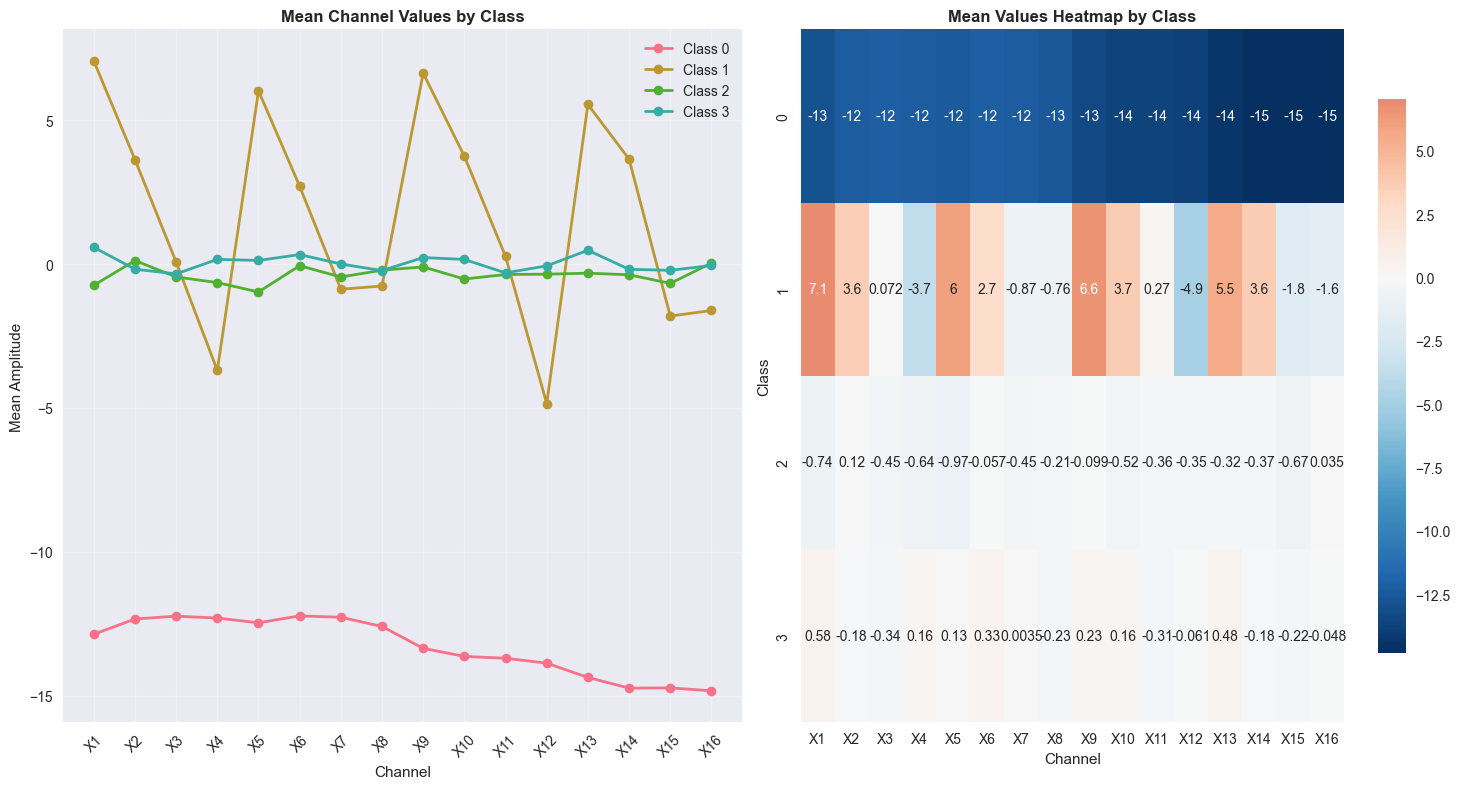


7. Variance Analysis


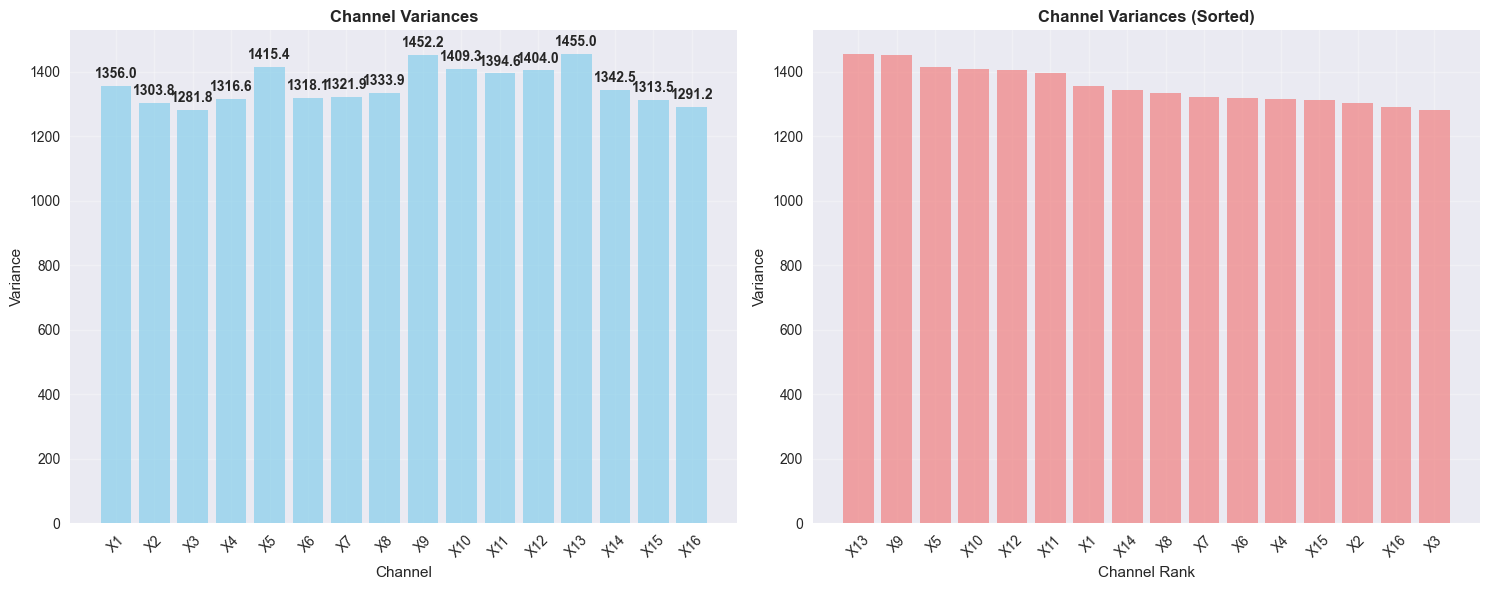


8. Outlier Analysis


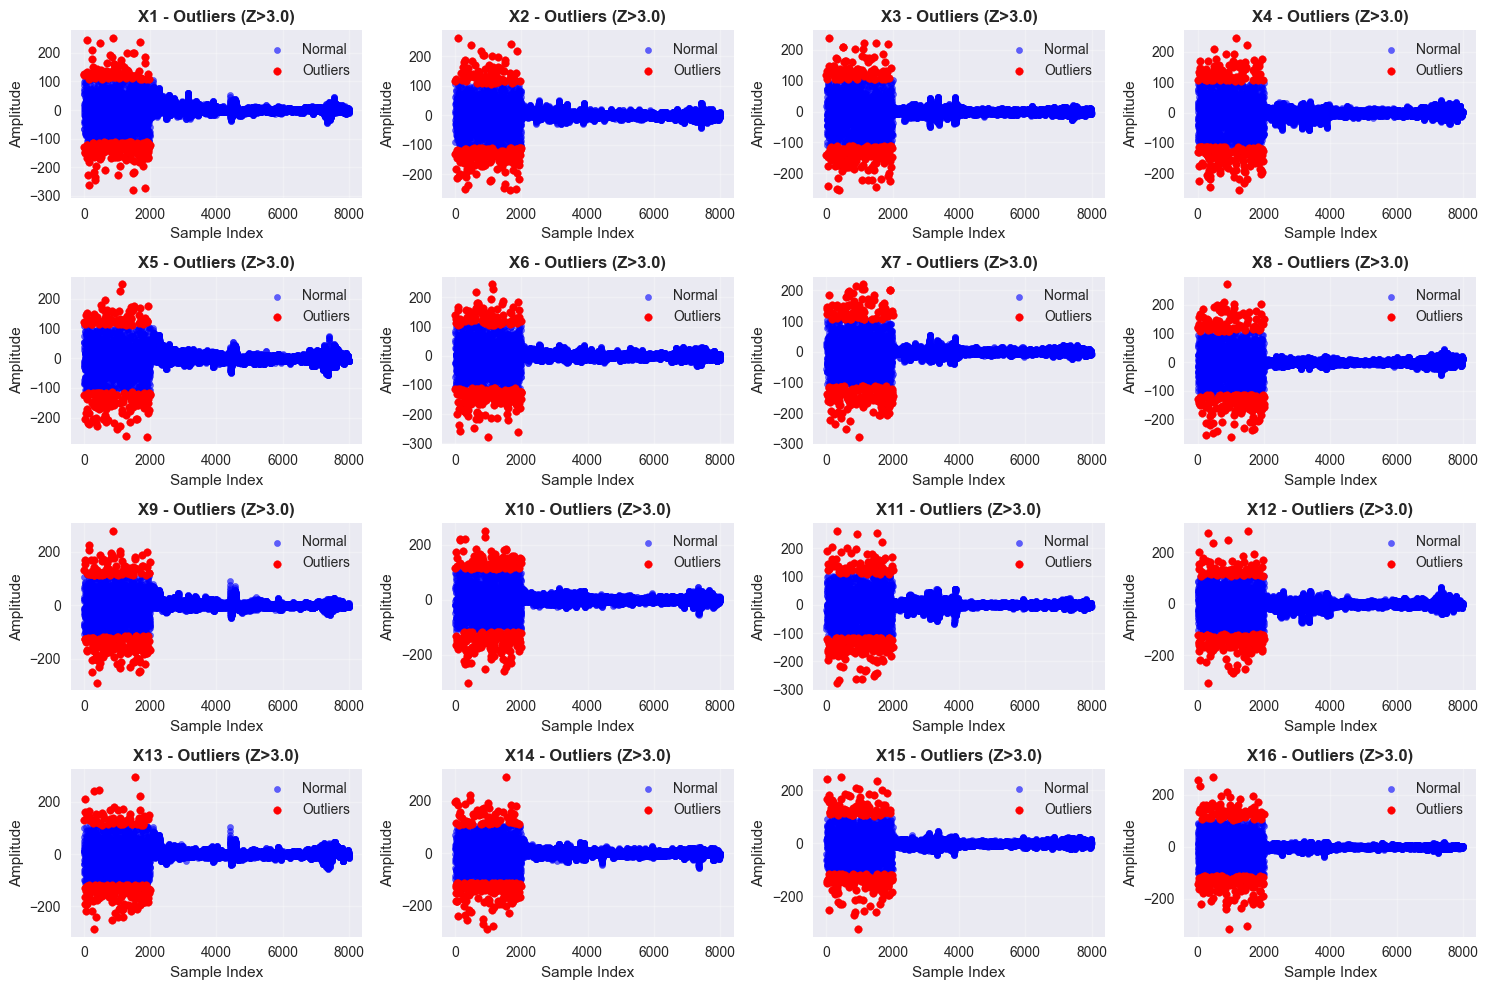


9. Distribution Shape Analysis


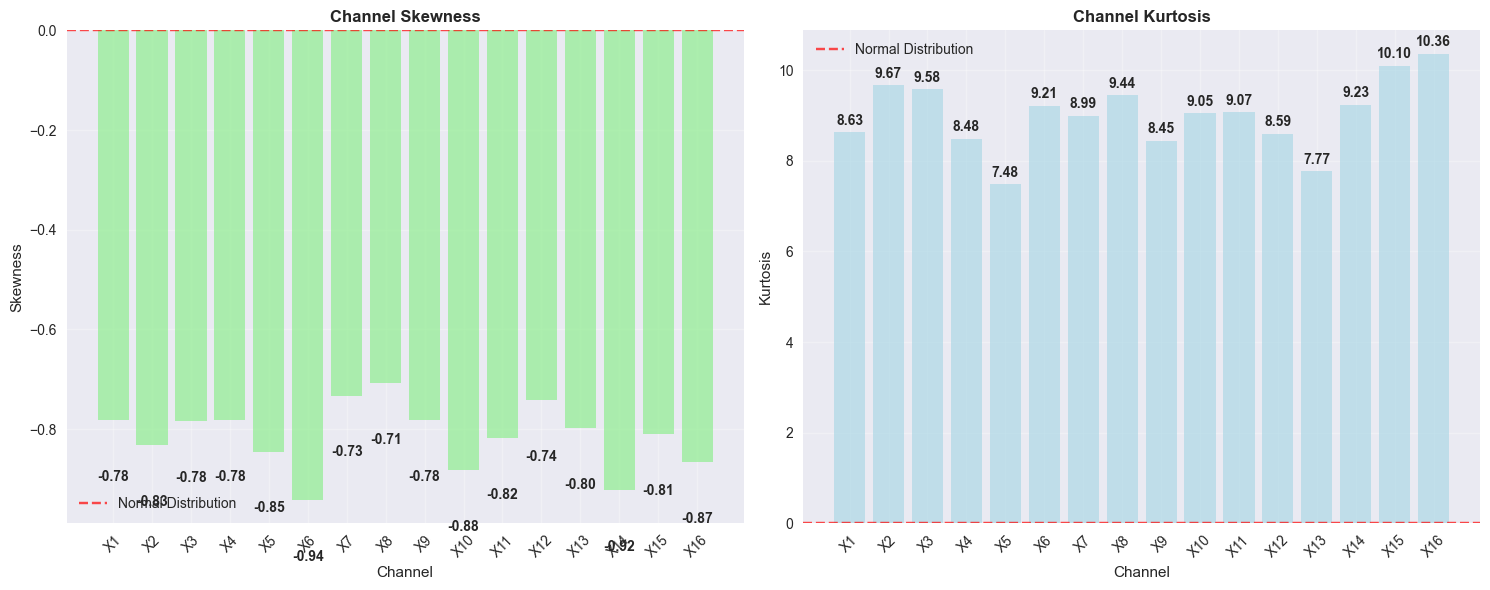


10. EEG Topography


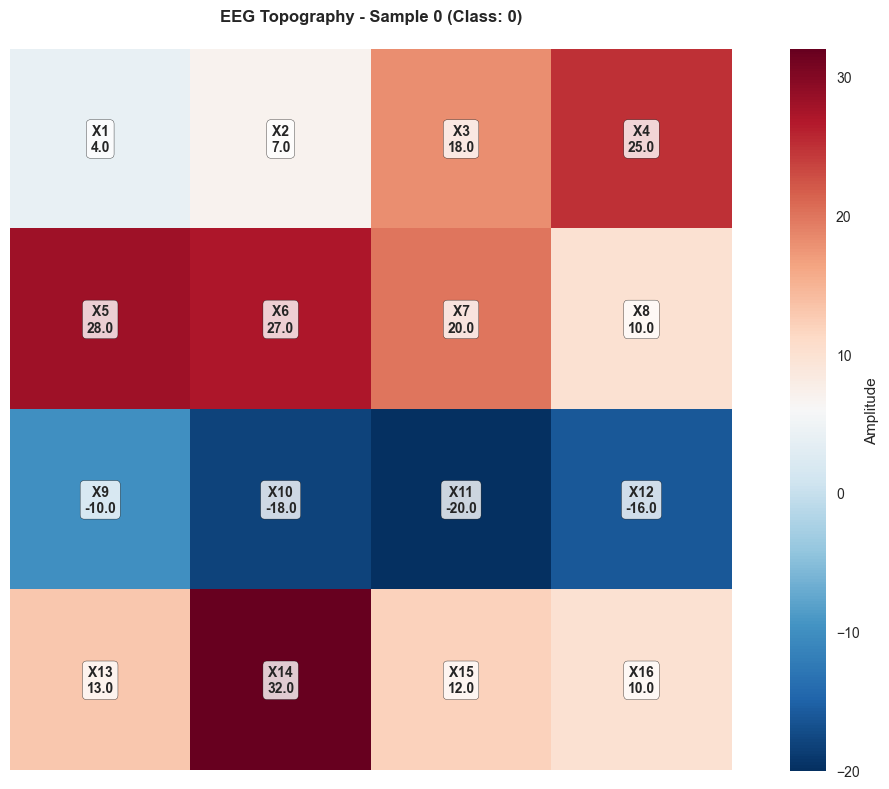


11. Class Separation Analysis


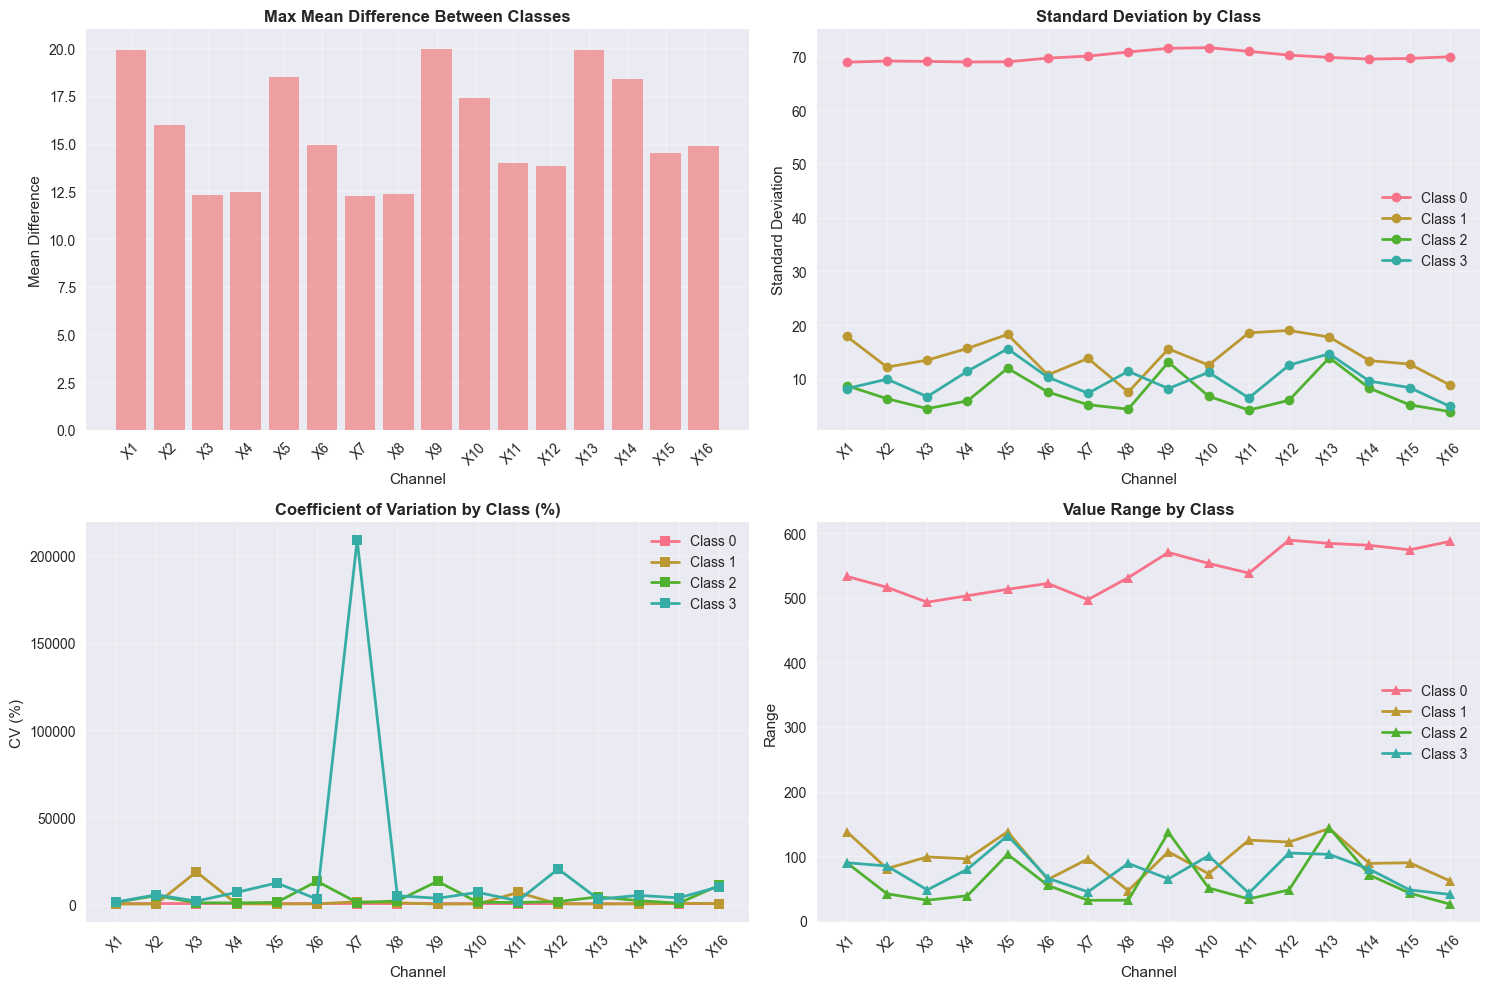

In [7]:
plot_class_distribution(df)
plot_eeg_waveforms(df)
plot_correlation_heatmap(df)

create_eda_report(df)

In [8]:
import pandas as pd
import numpy as np
from preprocessing.dataset import create_simple_split, EEGDataModule, get_dataset_info
from preprocessing.standardization import EEGPreprocessor, normalize_features, get_feature_importance
import torch

In [9]:
print("=== Loading and Examining Data ===")
data = pd.read_csv(path)
print(f"Original data shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

=== Loading and Examining Data ===
Original data shape: (8000, 17)
Columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'y']


In [10]:
dataset_info = get_dataset_info(path)
print(f"\nDataset Info:")
print(f"Total samples: {dataset_info['total_samples']}")
print(f"Number of features: {dataset_info['n_features']}")
print(f"Number of classes: {dataset_info['n_classes']}")
print(f"Class distribution: {dataset_info['class_distribution']}")


Dataset Info:
Total samples: 8000
Number of features: 16
Number of classes: 4
Class distribution: {0: 2000, 1: 2000, 2: 2000, 3: 2000}


In [11]:
print("\n=== Feature Importance Analysis ===")
importance_df = get_feature_importance(data)
print("Top 5 most important features:")
print(importance_df.head())


=== Feature Importance Analysis ===
Top 5 most important features:
    Feature  Correlation     Variance  Mutual_Info  Importance_Score
X11     X11     0.118392  1394.569721     0.432133          0.689393
X16     X16     0.143114  1291.223714     0.435925          0.676857
X8       X8     0.115265  1333.872095     0.419422          0.664725
X15     X15     0.137789  1313.540026     0.403547          0.655437
X7       X7     0.114569  1321.932863     0.391971          0.640768


In [12]:
data_normalized = normalize_features(data, method='zscore')  # Standard scaling

data_normalized = data.copy()

In [13]:
preprocessor = EEGPreprocessor(
    scaler_type='standard',  # 'standard', 'minmax', or 'robust'
    apply_pca=False,         # dimensionality reduction
    n_components=None,     
    remove_outliers=False,   
    outlier_threshold=3.0    # Z-score threshold for outlier detection
)


In [14]:
data_transformed = preprocessor.fit_transform(data_normalized)
print(f"Transformed data shape: {data_transformed.shape}")

preprocessing_info = preprocessor.get_preprocessing_info()
print(f"Preprocessing info: {preprocessing_info}")

Fitting preprocessor with standard scaler
Transformed data shape: (8000, 17)
Preprocessing info: {'scaler_type': 'standard', 'apply_pca': False, 'n_features_original': 16, 'is_fitted': True, 'feature_names': ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']}


In [15]:
print("\n=== Creating Data Loaders ===")
data_module = EEGDataModule(
    path,
    test_size=0.2,
    val_size=0.2,
    batch_size=32,
    random_state=42
)
train_loader, val_loader, test_loader = data_module.get_data_loaders()


=== Creating Data Loaders ===
Loading data from ../data/BEED_Data.csv
Loaded 8000 samples
Train set: 5120 samples
Validation set: 1280 samples
Test set: 1600 samples
Dataset created with 5120 samples and 16 features
Feature columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']
Target distribution: [1280 1280 1280 1280]
Dataset created with 1280 samples and 16 features
Feature columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']
Target distribution: [320 320 320 320]
Dataset created with 1600 samples and 16 features
Feature columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']
Target distribution: [400 400 400 400]
Created data loaders with batch size 32


In [16]:
print("\n=== Verifying Data Loaders ===")
for batch_idx, (data_batch, target_batch) in enumerate(train_loader):
    print(f"Training batch {batch_idx + 1}:")
    print(f"  Data shape: {data_batch.shape}")
    print(f"  Target shape: {target_batch.shape}")
    print(f"  Data range: [{data_batch.min():.3f}, {data_batch.max():.3f}]")
    print(f"  Target values: {torch.unique(target_batch).tolist()}")
    break

for batch_idx, (data_batch, target_batch) in enumerate(test_loader):
    print(f"Test batch {batch_idx + 1}:")
    print(f"  Data shape: {data_batch.shape}")
    print(f"  Target shape: {target_batch.shape}")
    print(f"  Data range: [{data_batch.min():.3f}, {data_batch.max():.3f}]")
    print(f"  Target values: {torch.unique(target_batch).tolist()}")
    break



=== Verifying Data Loaders ===
Training batch 1:
  Data shape: torch.Size([32, 16])
  Target shape: torch.Size([32])
  Data range: [-127.000, 249.000]
  Target values: [0, 1, 2, 3]
Test batch 1:
  Data shape: torch.Size([32, 16])
  Target shape: torch.Size([32])
  Data range: [-174.000, 168.000]
  Target values: [0, 1, 2, 3]


In [17]:
from models.alex_net import AlexNet_EEG

In [18]:
model = AlexNet_EEG(num_classes=4, input_channels=16, dropout_rate=0.5)

# model = AlexNet1D_Simplified(num_classes=4, input_channels=16, dropout_rate=0.5)

# model = create_alexnet1d(num_classes=4, simplified=True)

In [19]:
print(f"Model created with {sum(p.numel() for p in model.parameters()):,} parameters")

Model created with 338,756 parameters


In [20]:
# model = resnet18_1d(num_classes=4, input_channels=16)
# # model = resnet50_1d(num_classes=4, input_channels=16)

# # model = ResNet1D_Simplified(num_classes=4, input_channels=16)

# # model = create_resnet1d('resnet18', num_classes=4, simplified=False)

In [21]:
# model = UNet1D(in_channels=16, num_classes=4, depth=4)

# # model = UNet1D_Simplified(in_channels=16, num_classes=4)

# # Factory function
# # model = create_unet1d(in_channels=16, num_classes=4, depth=4, simplified=False)

In [22]:
from utils.losses import calculate_class_weights
from utils.metrics import ClassificationMetrics
from utils.optimizers import get_adam_config, create_optimizer_scheduler
from loops.train import train_model
from loops.test import test_model

In [23]:
print("Calculating class weights...")
class_weights = calculate_class_weights(train_loader)
print(f"Class weights: {class_weights}")

Calculating class weights...
Class weights: tensor([1., 1., 1., 1.])


In [24]:
optimizer_config = get_adam_config(lr=0.001, weight_decay=1e-5)
optimizer, scheduler = create_optimizer_scheduler(model, optimizer_config)

In [28]:
train_config = {
    'num_epochs': 50,
    'learning_rate': 0.001,
    'optimizer_type': 'adam',
    'loss_type': 'focal',
    'early_stopping_patience': 10,
    'use_class_weights': True,
    'save_best_model': True,
    'model_save_path': 'models/',
    'log_interval': 10,
    'loss_params': {'alpha': class_weights, 'gamma': 2.0}
}


print("\n=== Starting Training ===")
trainer = train_model(model, train_loader, val_loader, train_config, device='cpu')



=== Starting Training ===
Starting training on cpu
Model parameters: 338,756
Configuration: {'num_epochs': 50, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'scheduler_type': 'step', 'loss_type': 'focal', 'weight_decay': 1e-05, 'batch_size': 32, 'early_stopping_patience': 10, 'save_best_model': True, 'model_save_path': 'models/', 'log_interval': 10, 'use_class_weights': True, 'gradient_clipping': None, 'mixed_precision': False, 'scheduler_params': {}, 'loss_params': {'alpha': tensor([1., 1., 1., 1.]), 'gamma': 2.0}, 'optimizer_params': {}}


Epoch 1/50: 100%|██████████| 160/160 [00:00<00:00, 195.20it/s, Loss=0.1776, Acc=0.7134]



Epoch 1/50 (0.90s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7148
Precision (Macro): 0.6988
Recall (Macro): 0.7148
F1-Score (Macro): 0.6988
Cohen's Kappa: 0.6198
Matthews Correlation: 0.6257
ROC AUC (OVR): 0.8824
ROC AUC (OVO): 0.8824

Validation Metrics:

Metrics:
Accuracy: 0.7242
Precision (Macro): 0.7351
Recall (Macro): 0.7242
F1-Score (Macro): 0.6993
Cohen's Kappa: 0.6323
Matthews Correlation: 0.6589
ROC AUC (OVR): 0.9172
ROC AUC (OVO): 0.9172

Learning Rate: 0.001000
Model saved to models/best_model.pth


Epoch 2/50: 100%|██████████| 160/160 [00:00<00:00, 178.40it/s, Loss=0.1449, Acc=0.7109]



Epoch 2/50 (0.98s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7131
Precision (Macro): 0.6952
Recall (Macro): 0.7131
F1-Score (Macro): 0.6959
Cohen's Kappa: 0.6174
Matthews Correlation: 0.6234
ROC AUC (OVR): 0.8871
ROC AUC (OVO): 0.8871

Validation Metrics:

Metrics:
Accuracy: 0.7164
Precision (Macro): 0.7257
Recall (Macro): 0.7164
F1-Score (Macro): 0.6879
Cohen's Kappa: 0.6219
Matthews Correlation: 0.6519
ROC AUC (OVR): 0.9167
ROC AUC (OVO): 0.9167

Learning Rate: 0.001000


Epoch 3/50: 100%|██████████| 160/160 [00:00<00:00, 193.61it/s, Loss=0.2116, Acc=0.7016]



Epoch 3/50 (0.90s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7043
Precision (Macro): 0.6922
Recall (Macro): 0.7043
F1-Score (Macro): 0.6941
Cohen's Kappa: 0.6057
Matthews Correlation: 0.6088
ROC AUC (OVR): 0.8817
ROC AUC (OVO): 0.8817

Validation Metrics:

Metrics:
Accuracy: 0.7219
Precision (Macro): 0.7198
Recall (Macro): 0.7219
F1-Score (Macro): 0.6906
Cohen's Kappa: 0.6292
Matthews Correlation: 0.6559
ROC AUC (OVR): 0.9207
ROC AUC (OVO): 0.9207

Learning Rate: 0.001000


Epoch 4/50: 100%|██████████| 160/160 [00:00<00:00, 192.98it/s, Loss=0.5246, Acc=0.7202]



Epoch 4/50 (0.91s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7180
Precision (Macro): 0.7058
Recall (Macro): 0.7180
F1-Score (Macro): 0.7075
Cohen's Kappa: 0.6240
Matthews Correlation: 0.6272
ROC AUC (OVR): 0.8918
ROC AUC (OVO): 0.8918

Validation Metrics:

Metrics:
Accuracy: 0.6891
Precision (Macro): 0.7252
Recall (Macro): 0.6891
F1-Score (Macro): 0.6767
Cohen's Kappa: 0.5854
Matthews Correlation: 0.6041
ROC AUC (OVR): 0.9177
ROC AUC (OVO): 0.9177

Learning Rate: 0.001000


Epoch 5/50: 100%|██████████| 160/160 [00:00<00:00, 182.64it/s, Loss=0.3733, Acc=0.7107]



Epoch 5/50 (0.95s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7113
Precision (Macro): 0.7034
Recall (Macro): 0.7113
F1-Score (Macro): 0.7054
Cohen's Kappa: 0.6151
Matthews Correlation: 0.6166
ROC AUC (OVR): 0.8853
ROC AUC (OVO): 0.8853

Validation Metrics:

Metrics:
Accuracy: 0.7461
Precision (Macro): 0.7561
Recall (Macro): 0.7461
F1-Score (Macro): 0.7320
Cohen's Kappa: 0.6615
Matthews Correlation: 0.6773
ROC AUC (OVR): 0.9210
ROC AUC (OVO): 0.9210

Learning Rate: 0.001000
Model saved to models/best_model.pth


Epoch 6/50: 100%|██████████| 160/160 [00:00<00:00, 173.52it/s, Loss=0.1824, Acc=0.7264]



Epoch 6/50 (1.00s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7266
Precision (Macro): 0.7163
Recall (Macro): 0.7266
F1-Score (Macro): 0.7174
Cohen's Kappa: 0.6354
Matthews Correlation: 0.6384
ROC AUC (OVR): 0.8927
ROC AUC (OVO): 0.8927

Validation Metrics:

Metrics:
Accuracy: 0.7312
Precision (Macro): 0.7410
Recall (Macro): 0.7313
F1-Score (Macro): 0.7198
Cohen's Kappa: 0.6417
Matthews Correlation: 0.6547
ROC AUC (OVR): 0.9162
ROC AUC (OVO): 0.9162

Learning Rate: 0.001000


Epoch 7/50: 100%|██████████| 160/160 [00:00<00:00, 173.09it/s, Loss=0.1918, Acc=0.7177]



Epoch 7/50 (1.00s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7182
Precision (Macro): 0.7055
Recall (Macro): 0.7182
F1-Score (Macro): 0.7063
Cohen's Kappa: 0.6242
Matthews Correlation: 0.6283
ROC AUC (OVR): 0.8931
ROC AUC (OVO): 0.8931

Validation Metrics:

Metrics:
Accuracy: 0.7234
Precision (Macro): 0.7335
Recall (Macro): 0.7234
F1-Score (Macro): 0.7079
Cohen's Kappa: 0.6312
Matthews Correlation: 0.6484
ROC AUC (OVR): 0.9160
ROC AUC (OVO): 0.9160

Learning Rate: 0.001000


Epoch 8/50: 100%|██████████| 160/160 [00:00<00:00, 189.67it/s, Loss=0.1964, Acc=0.7198]



Epoch 8/50 (0.92s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7193
Precision (Macro): 0.7071
Recall (Macro): 0.7193
F1-Score (Macro): 0.7086
Cohen's Kappa: 0.6258
Matthews Correlation: 0.6293
ROC AUC (OVR): 0.8922
ROC AUC (OVO): 0.8922

Validation Metrics:

Metrics:
Accuracy: 0.7063
Precision (Macro): 0.7101
Recall (Macro): 0.7063
F1-Score (Macro): 0.6818
Cohen's Kappa: 0.6083
Matthews Correlation: 0.6317
ROC AUC (OVR): 0.9132
ROC AUC (OVO): 0.9132

Learning Rate: 0.001000


Epoch 9/50: 100%|██████████| 160/160 [00:00<00:00, 180.57it/s, Loss=0.1723, Acc=0.7260]



Epoch 9/50 (0.97s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7260
Precision (Macro): 0.7140
Recall (Macro): 0.7260
F1-Score (Macro): 0.7142
Cohen's Kappa: 0.6346
Matthews Correlation: 0.6389
ROC AUC (OVR): 0.8944
ROC AUC (OVO): 0.8944

Validation Metrics:

Metrics:
Accuracy: 0.7125
Precision (Macro): 0.7160
Recall (Macro): 0.7125
F1-Score (Macro): 0.6904
Cohen's Kappa: 0.6167
Matthews Correlation: 0.6375
ROC AUC (OVR): 0.9165
ROC AUC (OVO): 0.9165

Learning Rate: 0.001000


Epoch 10/50: 100%|██████████| 160/160 [00:00<00:00, 187.99it/s, Loss=0.3399, Acc=0.7210]



Epoch 10/50 (0.93s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7225
Precision (Macro): 0.7120
Recall (Macro): 0.7225
F1-Score (Macro): 0.7108
Cohen's Kappa: 0.6299
Matthews Correlation: 0.6349
ROC AUC (OVR): 0.8908
ROC AUC (OVO): 0.8908

Validation Metrics:

Metrics:
Accuracy: 0.7055
Precision (Macro): 0.7010
Recall (Macro): 0.7055
F1-Score (Macro): 0.6704
Cohen's Kappa: 0.6073
Matthews Correlation: 0.6382
ROC AUC (OVR): 0.9081
ROC AUC (OVO): 0.9081

Learning Rate: 0.000100


Epoch 11/50: 100%|██████████| 160/160 [00:00<00:00, 187.27it/s, Loss=0.1571, Acc=0.7245]



Epoch 11/50 (0.93s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7264
Precision (Macro): 0.7115
Recall (Macro): 0.7264
F1-Score (Macro): 0.7098
Cohen's Kappa: 0.6352
Matthews Correlation: 0.6420
ROC AUC (OVR): 0.8928
ROC AUC (OVO): 0.8928

Validation Metrics:

Metrics:
Accuracy: 0.7008
Precision (Macro): 0.7081
Recall (Macro): 0.7008
F1-Score (Macro): 0.6754
Cohen's Kappa: 0.6010
Matthews Correlation: 0.6271
ROC AUC (OVR): 0.9149
ROC AUC (OVO): 0.9149

Learning Rate: 0.000100


Epoch 12/50: 100%|██████████| 160/160 [00:00<00:00, 188.48it/s, Loss=0.1535, Acc=0.7401]



Epoch 12/50 (0.93s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7391
Precision (Macro): 0.7271
Recall (Macro): 0.7391
F1-Score (Macro): 0.7241
Cohen's Kappa: 0.6521
Matthews Correlation: 0.6587
ROC AUC (OVR): 0.8992
ROC AUC (OVO): 0.8992

Validation Metrics:

Metrics:
Accuracy: 0.7148
Precision (Macro): 0.7208
Recall (Macro): 0.7148
F1-Score (Macro): 0.6895
Cohen's Kappa: 0.6198
Matthews Correlation: 0.6453
ROC AUC (OVR): 0.9226
ROC AUC (OVO): 0.9226

Learning Rate: 0.000100


Epoch 13/50: 100%|██████████| 160/160 [00:00<00:00, 195.45it/s, Loss=0.1744, Acc=0.7368]



Epoch 13/50 (0.90s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7354
Precision (Macro): 0.7199
Recall (Macro): 0.7354
F1-Score (Macro): 0.7177
Cohen's Kappa: 0.6471
Matthews Correlation: 0.6544
ROC AUC (OVR): 0.8997
ROC AUC (OVO): 0.8997

Validation Metrics:

Metrics:
Accuracy: 0.7109
Precision (Macro): 0.7229
Recall (Macro): 0.7109
F1-Score (Macro): 0.6890
Cohen's Kappa: 0.6146
Matthews Correlation: 0.6390
ROC AUC (OVR): 0.9131
ROC AUC (OVO): 0.9131

Learning Rate: 0.000100


Epoch 14/50: 100%|██████████| 160/160 [00:00<00:00, 198.23it/s, Loss=0.2167, Acc=0.7421]



Epoch 14/50 (0.88s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7439
Precision (Macro): 0.7326
Recall (Macro): 0.7439
F1-Score (Macro): 0.7289
Cohen's Kappa: 0.6586
Matthews Correlation: 0.6654
ROC AUC (OVR): 0.9034
ROC AUC (OVO): 0.9034

Validation Metrics:

Metrics:
Accuracy: 0.7180
Precision (Macro): 0.7246
Recall (Macro): 0.7180
F1-Score (Macro): 0.6935
Cohen's Kappa: 0.6240
Matthews Correlation: 0.6487
ROC AUC (OVR): 0.9266
ROC AUC (OVO): 0.9266

Learning Rate: 0.000100


Epoch 15/50: 100%|██████████| 160/160 [00:00<00:00, 179.55it/s, Loss=0.1532, Acc=0.7425]



Epoch 15/50 (0.97s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7414
Precision (Macro): 0.7267
Recall (Macro): 0.7414
F1-Score (Macro): 0.7230
Cohen's Kappa: 0.6552
Matthews Correlation: 0.6633
ROC AUC (OVR): 0.9058
ROC AUC (OVO): 0.9058

Validation Metrics:

Metrics:
Accuracy: 0.7156
Precision (Macro): 0.7255
Recall (Macro): 0.7156
F1-Score (Macro): 0.6940
Cohen's Kappa: 0.6208
Matthews Correlation: 0.6441
ROC AUC (OVR): 0.9224
ROC AUC (OVO): 0.9224

Learning Rate: 0.000100


Epoch 16/50: 100%|██████████| 160/160 [00:00<00:00, 193.19it/s, Loss=0.1464, Acc=0.7446]



Epoch 16/50 (0.91s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7463
Precision (Macro): 0.7337
Recall (Macro): 0.7463
F1-Score (Macro): 0.7292
Cohen's Kappa: 0.6617
Matthews Correlation: 0.6695
ROC AUC (OVR): 0.9079
ROC AUC (OVO): 0.9079

Validation Metrics:

Metrics:
Accuracy: 0.7164
Precision (Macro): 0.7236
Recall (Macro): 0.7164
F1-Score (Macro): 0.6924
Cohen's Kappa: 0.6219
Matthews Correlation: 0.6467
ROC AUC (OVR): 0.9243
ROC AUC (OVO): 0.9243

Learning Rate: 0.000100


Epoch 17/50: 100%|██████████| 160/160 [00:00<00:00, 193.05it/s, Loss=0.2375, Acc=0.7554]



Epoch 17/50 (0.91s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7545
Precision (Macro): 0.7435
Recall (Macro): 0.7545
F1-Score (Macro): 0.7389
Cohen's Kappa: 0.6727
Matthews Correlation: 0.6798
ROC AUC (OVR): 0.9109
ROC AUC (OVO): 0.9109

Validation Metrics:

Metrics:
Accuracy: 0.7203
Precision (Macro): 0.7266
Recall (Macro): 0.7203
F1-Score (Macro): 0.6948
Cohen's Kappa: 0.6271
Matthews Correlation: 0.6529
ROC AUC (OVR): 0.9187
ROC AUC (OVO): 0.9187

Learning Rate: 0.000100


Epoch 18/50: 100%|██████████| 160/160 [00:00<00:00, 170.53it/s, Loss=0.1271, Acc=0.7521]



Epoch 18/50 (1.02s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7525
Precision (Macro): 0.7405
Recall (Macro): 0.7525
F1-Score (Macro): 0.7374
Cohen's Kappa: 0.6701
Matthews Correlation: 0.6766
ROC AUC (OVR): 0.9075
ROC AUC (OVO): 0.9075

Validation Metrics:

Metrics:
Accuracy: 0.7180
Precision (Macro): 0.7308
Recall (Macro): 0.7180
F1-Score (Macro): 0.6967
Cohen's Kappa: 0.6240
Matthews Correlation: 0.6482
ROC AUC (OVR): 0.9168
ROC AUC (OVO): 0.9168

Learning Rate: 0.000100


Epoch 19/50: 100%|██████████| 160/160 [00:00<00:00, 194.68it/s, Loss=0.3716, Acc=0.7454]



Epoch 19/50 (0.91s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7473
Precision (Macro): 0.7355
Recall (Macro): 0.7473
F1-Score (Macro): 0.7327
Cohen's Kappa: 0.6630
Matthews Correlation: 0.6694
ROC AUC (OVR): 0.9095
ROC AUC (OVO): 0.9095

Validation Metrics:

Metrics:
Accuracy: 0.7102
Precision (Macro): 0.7291
Recall (Macro): 0.7102
F1-Score (Macro): 0.6911
Cohen's Kappa: 0.6135
Matthews Correlation: 0.6376
ROC AUC (OVR): 0.9113
ROC AUC (OVO): 0.9113

Learning Rate: 0.000100


Epoch 20/50: 100%|██████████| 160/160 [00:00<00:00, 184.78it/s, Loss=0.1244, Acc=0.7494]



Epoch 20/50 (0.95s)
--------------------------------------------------
Training Metrics:

Metrics:
Accuracy: 0.7500
Precision (Macro): 0.7394
Recall (Macro): 0.7500
F1-Score (Macro): 0.7338
Cohen's Kappa: 0.6667
Matthews Correlation: 0.6745
ROC AUC (OVR): 0.9110
ROC AUC (OVO): 0.9110

Validation Metrics:

Metrics:
Accuracy: 0.7109
Precision (Macro): 0.7239
Recall (Macro): 0.7109
F1-Score (Macro): 0.6901
Cohen's Kappa: 0.6146
Matthews Correlation: 0.6382
ROC AUC (OVR): 0.9206
ROC AUC (OVO): 0.9206

Learning Rate: 0.000010
Early stopping triggered at epoch 20

Training completed in 18.79 seconds
Best validation metric: 0.7320 at epoch 5
Model saved to models/final_model.pth



=== Starting Testing ===
Starting testing on cpu

TEST RESULTS

Metrics:
Accuracy: 0.7031
Precision (Macro): 0.7176
Recall (Macro): 0.7031
F1-Score (Macro): 0.6800
Cohen's Kappa: 0.6042
Matthews Correlation: 0.6305
ROC AUC (OVR): 0.9157
ROC AUC (OVO): 0.9157


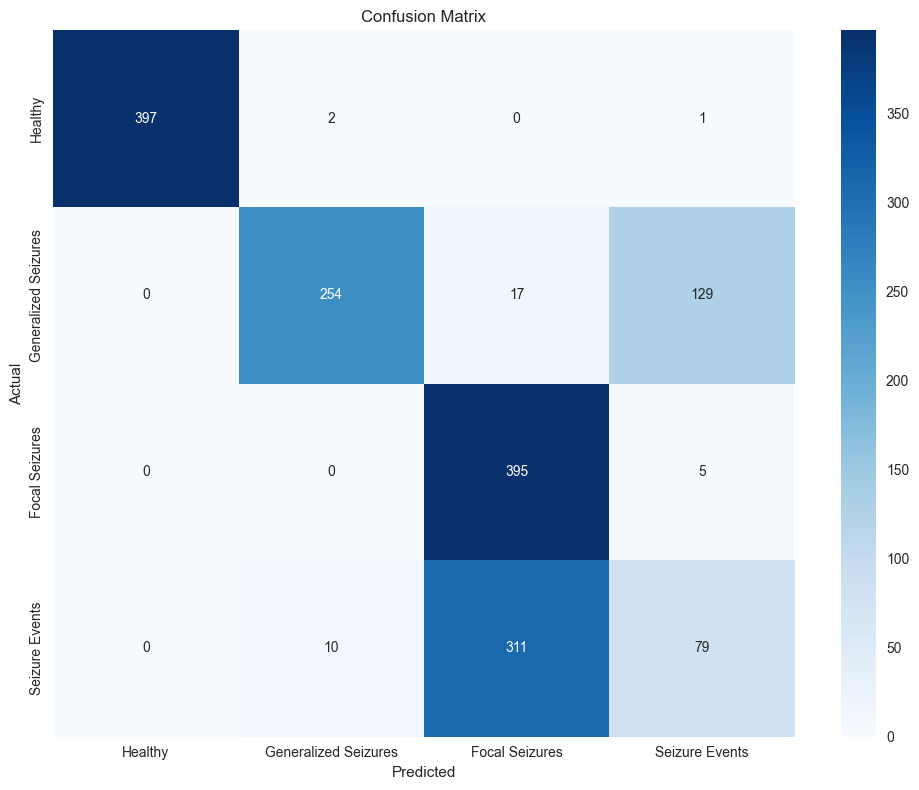

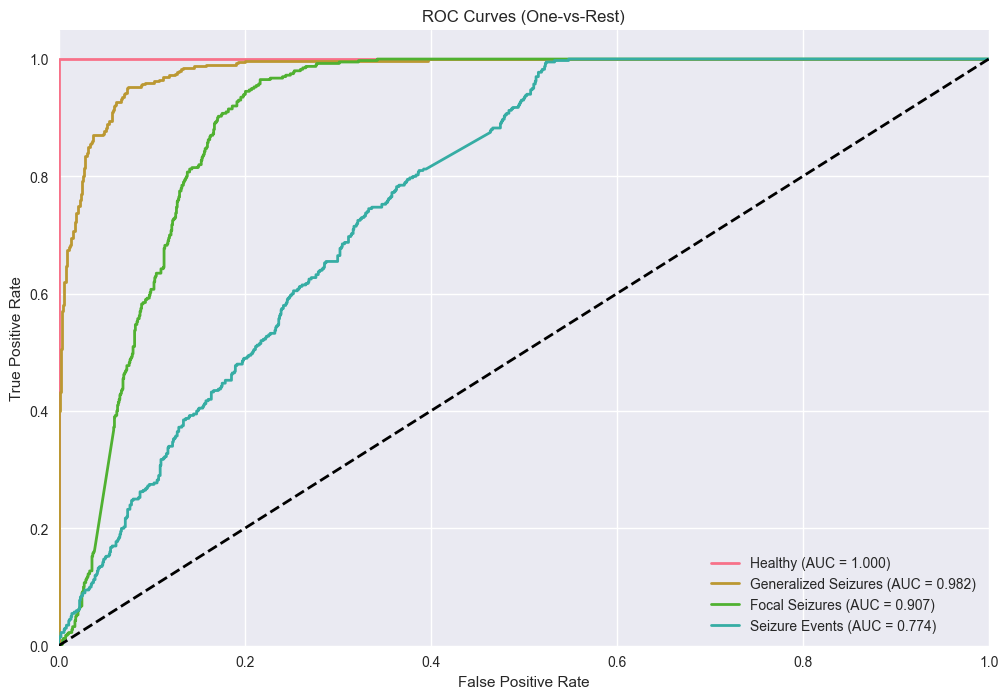

Predictions saved to results/predictions.csv

=== Final Results ===
Test Accuracy: 0.7031
Test F1 Score: 0.6800
Test Precision: 0.7176
Test Recall: 0.7031
Training history plot saved to results/training_history.png


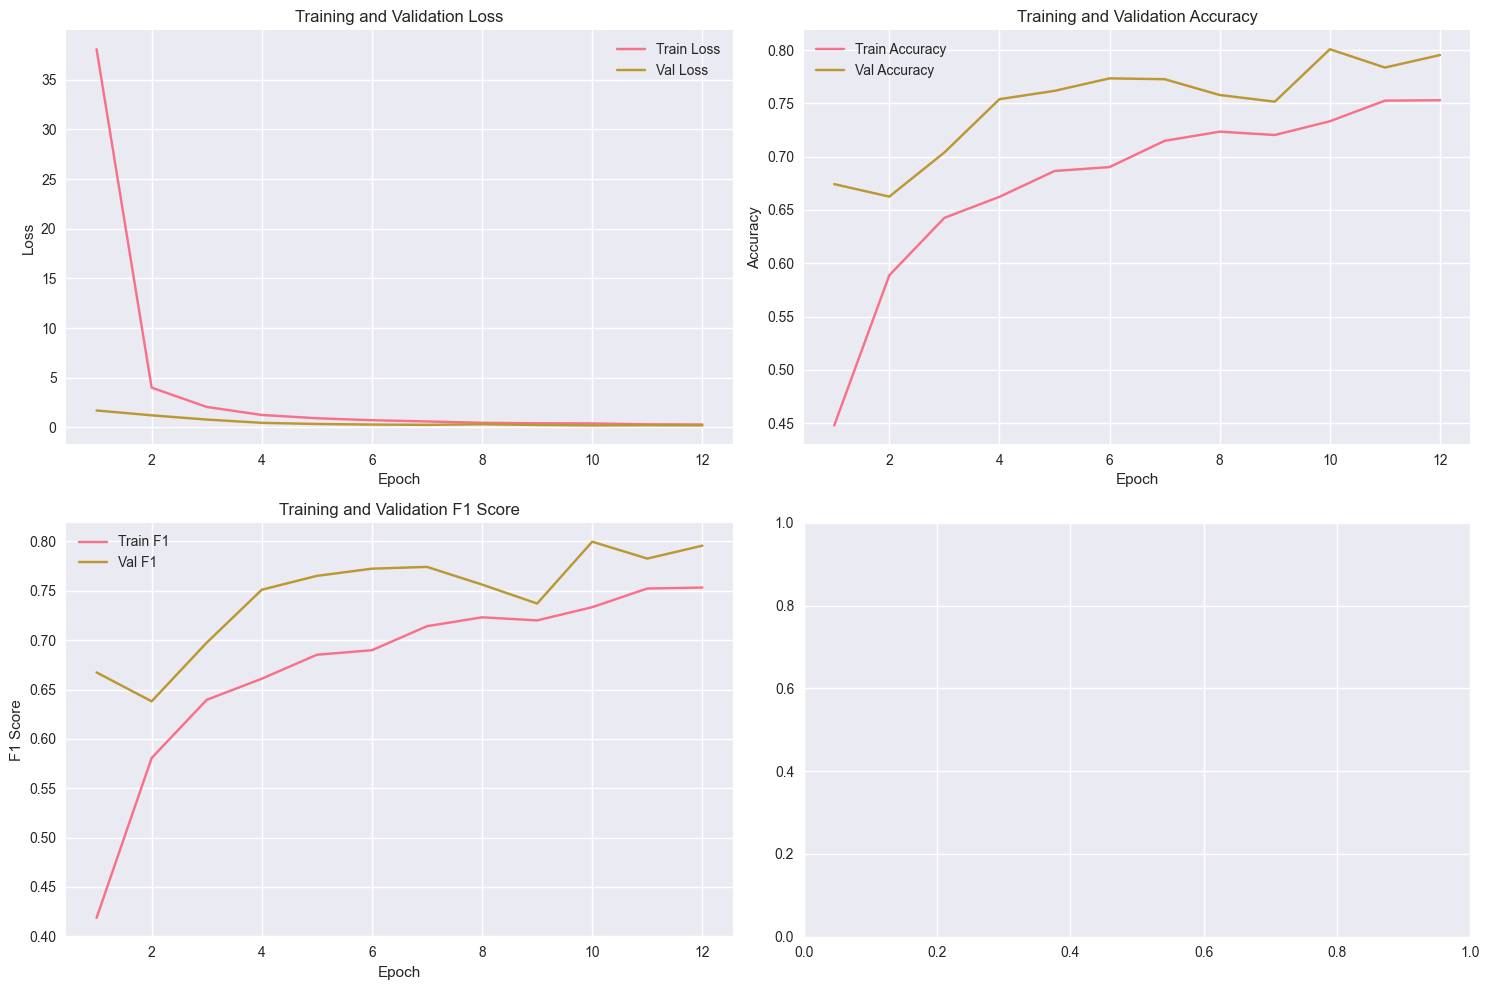

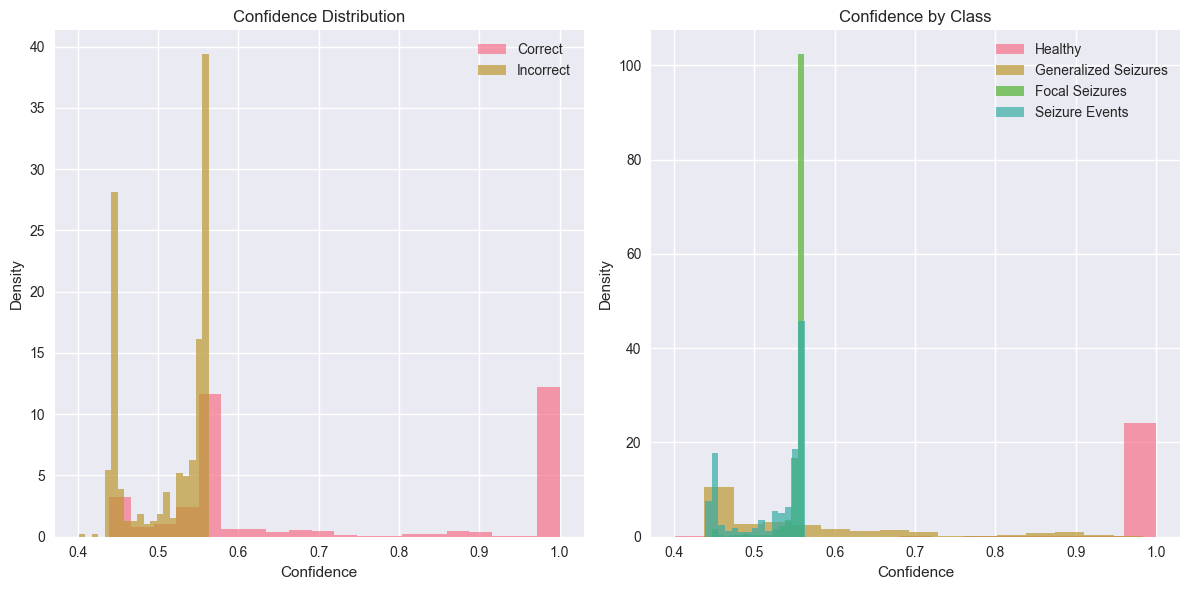

In [ ]:
test_config = {
    'save_predictions': True,
    'save_confusion_matrix': True,
    'class_names': ['Healthy', 'Generalized Seizures', 'Focal Seizures', 'Seizure Events']
}

print("\n=== Starting Testing ===")
tester = test_model(model, test_loader, device='cpu', config=test_config)

print("\nFinal Results")
final_metrics = tester.test_metrics.compute()
print(f"Test Accuracy: {final_metrics['accuracy']:.4f}")
print(f"Test F1 Score: {final_metrics['f1_macro']:.4f}")
print(f"Test Precision: {final_metrics['precision_macro']:.4f}")
print(f"Test Recall: {final_metrics['recall_macro']:.4f}")

trainer.plot_training_history(save_path='results/training_history.png')

tester.plot_confidence_distribution()